**Test Notebook**

Use this notebook to test various databricks issues with ML libs

In [0]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
from subprocess import call

***Testing tree plot with databricks***

In [0]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

In [0]:

# Step 1: Import the model you want to use
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier
# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)
# Step 3: Train the model on the data
clf.fit(X_train, Y_train)
# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial
# clf.predict(X_test)

Out[4]: DecisionTreeClassifier(max_depth=2, random_state=0)

In [0]:

# def plot_graphviz_databricks(model, filename="tree.dot", png="tree.png"):
#   fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
#   cn=['setosa', 'versicolor', 'virginica']

#   tree.export_graphviz(model,
#                        out_file=filename,
#                        feature_names = fn, 
#                        class_names=cn,
#                        filled = True)
  
#   call(['dot', '-Tpng', filename, '-o', 'png', '-Gdpi=600'])
  
#   plt.figure(figsize = (14, 18))
#   plt.imshow(plt.imread(png))
#   plt.axis('off');
#   plt.show();

In [0]:
# plot_graphviz_databricks(clf)

In [0]:
# from IPython.display import Image
# import graphviz 
# import pydotplus
# from sklearn.externals.six import StringIO

# fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
# cn=['setosa', 'versicolor', 'virginica']

# dot_data = StringIO()
# tree.export_graphviz(clf, out_file=dot_data, filled=True)  

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('tree.png')

plot XGBoost tree

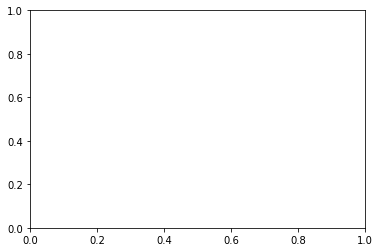

--------------------------------------------------------------------------- 
 FileNotFoundError Traceback (most recent call last)
 /databricks/python/lib/python3.7/site-packages/graphviz/backend.py in run (cmd, input, capture_output, check, encoding, quiet, **kwargs) 
 163 try : 
 --> 164 proc = subprocess . Popen ( cmd , startupinfo = get_startupinfo ( ) , ** kwargs ) 
 165 except OSError as e : 

 /databricks/python/lib/python3.7/subprocess.py in __init__ (self, args, bufsize, executable, stdin, stdout, stderr, preexec_fn, close_fds, shell, cwd, env, universal_newlines, startupinfo, creationflags, restore_signals, start_new_session, pass_fds, encoding, errors, text) 
 799 errread , errwrite , 
 --> 800 restore_signals, start_new_session)
 801 except : 

 /databricks/python/lib/python3.7/subprocess.py in _execute_child (self, args, executable, preexec_fn, close_fds, pass_fds, cwd, env, startupinfo, creationflags, shell, p2cread, p2cwrite, c2pread, c2pwrite, errread, errwrite, restore_signals, start_new_session) 
 1550 err_msg += ': ' + repr ( err_filename ) 
 -> 1551 raise child_exception_type ( errno_num , err_msg , err_filename ) 
 1552 raise child_exception_type ( err_msg ) 

 FileNotFoundError : [Errno 2] No such file or directory: 'dot': 'dot'

During handling of the above exception, another exception occurred:

 ExecutableNotFound Traceback (most recent call last)
 <command-481533886879559> in <module> 
 22 
 23 # plot single tree 
 ---> 24 plot_tree ( model ) 
 25 plt . show ( ) 
 26 

 /databricks/python/lib/python3.7/site-packages/xgboost/plotting.py in plot_tree (booster, fmap, num_trees, rankdir, ax, **kwargs) 
 248 
 249 s = BytesIO ( ) 
 --> 250 s . write ( g . pipe ( format = 'png' ) ) 
 251 s . seek ( 0 ) 
 252 img = image . imread ( s ) 

 /databricks/python/lib/python3.7/site-packages/graphviz/files.py in pipe (self, format, renderer, formatter, quiet) 
 136 out = backend.pipe(self._engine, format, data,
 137 renderer = renderer , formatter = formatter , 
 --> 138 quiet=quiet)
 139 
 140 return out

 /databricks/python/lib/python3.7/site-packages/graphviz/backend.py in pipe (engine, format, data, renderer, formatter, quiet) 
 242 """
 243 cmd , _ = command ( engine , format , None , renderer , formatter ) 
 --> 244 out , _ = run ( cmd , input = data , capture_output = True , check = True , quiet = quiet ) 
 245 return out
 246 

 /databricks/python/lib/python3.7/site-packages/graphviz/backend.py in run (cmd, input, capture_output, check, encoding, quiet, **kwargs) 
 165 except OSError as e : 
 166 if e . errno == errno . ENOENT : 
 --> 167 raise ExecutableNotFound ( cmd ) 
 168 else : 
 169 raise 

 ExecutableNotFound : failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

In [0]:
# plot xgboost tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from xgboost import plot_tree, to_graphviz
import graphviz

# load data
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, Y_train)

# plot single tree
plot_tree(model)
plt.show()

# dot = to_graphviz(model)  
# dot.render("tree", view=True)

***Testing parallel processing***

In [0]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from joblibspark import register_spark
from sklearn.utils import parallel_backend

register_spark() # register spark backend

iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = svm.SVC(gamma='auto')

clf = GridSearchCV(svr, parameters, cv=5)

with parallel_backend('spark', n_jobs=3):
    clf.fit(iris.data, iris.target)

--------------------------------------------------------------------------- 
 Py4JError Traceback (most recent call last)
 <command-4101097221978692> in <module> 
 13 
 14 with parallel_backend ( 'spark' , n_jobs = 3 ) : 
 ---> 15 clf . fit ( iris . data , iris . target ) 

 /databricks/python/lib/python3.7/site-packages/sklearn/utils/validation.py in inner_f (*args, **kwargs) 
 70 FutureWarning)
 71 kwargs . update ( { k : arg for k , arg in zip ( sig . parameters , args ) } ) 
 ---> 72 return f ( ** kwargs ) 
 73 return inner_f
 74 

 /databricks/python/lib/python3.7/site-packages/sklearn/model_selection/_search.py in fit (self, X, y, groups, **fit_params) 
 693 verbose=self.verbose)
 694 results = { } 
 --> 695 with parallel : 
 696 all_candidate_params = [ ] 
 697 all_out = [ ] 

 /databricks/python/lib/python3.7/site-packages/joblib/parallel.py in __enter__ (self) 
 698 def __enter__ ( self ) : 
 699 self . _managed_backend = True 
 --> 700 self . _initialize_backend ( ) 
 701 return self
 702 

 /databricks/python/lib/python3.7/site-packages/joblib/parallel.py in _initialize_backend (self) 
 709 try : 
 710 n_jobs = self._backend.configure(n_jobs=self.n_jobs, parallel=self,
 --> 711 **self._backend_args)
 712 if self . timeout is not None and not self . _backend . supports_timeout : 
 713 warnings.warn(

 /databricks/python/lib/python3.7/site-packages/joblibspark/backend.py in configure (self, n_jobs, parallel, prefer, require, **backend_args) 
 108 
 109 def configure ( self , n_jobs = 1 , parallel = None , prefer = None , require = None , ** backend_args ) : 
 --> 110 n_jobs = self . effective_n_jobs ( n_jobs ) 
 111 self . _n_jobs = n_jobs
 112 return n_jobs

 /databricks/python/lib/python3.7/site-packages/joblibspark/backend.py in effective_n_jobs (self, n_jobs) 
 79 
 80 def effective_n_jobs ( self , n_jobs ) : 
 ---> 81 max_num_concurrent_tasks = self . _get_max_num_concurrent_tasks ( ) 
 82 if n_jobs is None : 
 83 n_jobs = 1 

 /databricks/python/lib/python3.7/site-packages/joblibspark/backend.py in _get_max_num_concurrent_tasks (self) 
 96 # maxNumConcurrentTasks() is a package private API 
 97 # pylint: disable=W0212 
 ---> 98 return self . _spark . sparkContext . _jsc . sc ( ) . maxNumConcurrentTasks ( ) 
 99 
 100 def abort_everything ( self , ensure_ready = True ) : 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1303 answer = self . gateway_client . send_command ( command ) 
 1304 return_value = get_return_value(
 -> 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 
 1307 for temp_arg in temp_args : 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 125 def deco ( * a , ** kw ) : 
 126 try : 
 --> 127 return f ( * a , ** kw ) 
 128 except py4j . protocol . Py4JJavaError as e : 
 129 converted = convert_exception ( e . java_exception ) 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py in get_return_value (answer, gateway_client, target_id, name) 
 330 raise Py4JError(
 331 "An error occurred while calling {0}{1}{2}. Trace:\n{3}\n" . 
 --> 332 format(target_id, ".", name, value))
 333 else : 
 334 raise Py4JError(

 Py4JError : An error occurred while calling o252.maxNumConcurrentTasks. Trace:
py4j.security.Py4JSecurityException: Method public int org.apache.spark.SparkContext.maxNumConcurrentTasks() is not whitelisted on class class org.apache.spark.SparkContext
	at py4j.security.WhitelistingPy4JSecurityManager.checkCall(WhitelistingPy4JSecurityManager.java:435)
	at py4j.Gateway.invoke(Gateway.java:294)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:251)
	at java.lang.Thread.run(Thread.java:748)

In [0]:
from sklearn.utils import parallel_backend
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import svm
from joblibspark import register_spark

register_spark() # register spark backend

iris = datasets.load_iris()
clf = svm.SVC(kernel='linear', C=1)
with parallel_backend('spark', n_jobs=3):
  scores = cross_val_score(clf, iris.data, iris.target, cv=5)

print(scores)

--------------------------------------------------------------------------- 
 Py4JError Traceback (most recent call last)
 <command-4101097221978697> in <module> 
 10 clf = svm . SVC ( kernel = 'linear' , C = 1 ) 
 11 with parallel_backend ( 'spark' , n_jobs = 3 ) : 
 ---> 12 scores = cross_val_score ( clf , iris . data , iris . target , cv = 5 ) 
 13 
 14 print ( scores ) 

 /databricks/python/lib/python3.7/site-packages/sklearn/utils/validation.py in inner_f (*args, **kwargs) 
 70 FutureWarning)
 71 kwargs . update ( { k : arg for k , arg in zip ( sig . parameters , args ) } ) 
 ---> 72 return f ( ** kwargs ) 
 73 return inner_f
 74 

 /databricks/python/lib/python3.7/site-packages/sklearn/model_selection/_validation.py in cross_val_score (estimator, X, y, groups, scoring, cv, n_jobs, verbose, fit_params, pre_dispatch, error_score) 
 404 fit_params = fit_params , 
 405 pre_dispatch = pre_dispatch , 
 --> 406 error_score=error_score)
 407 return cv_results [ 'test_score' ] 
 408 

 /databricks/python/lib/python3.7/site-packages/sklearn/utils/validation.py in inner_f (*args, **kwargs) 
 70 FutureWarning)
 71 kwargs . update ( { k : arg for k , arg in zip ( sig . parameters , args ) } ) 
 ---> 72 return f ( ** kwargs ) 
 73 return inner_f
 74 

 /databricks/python/lib/python3.7/site-packages/sklearn/model_selection/_validation.py in cross_validate (estimator, X, y, groups, scoring, cv, n_jobs, verbose, fit_params, pre_dispatch, return_train_score, return_estimator, error_score) 
 246 return_times = True , return_estimator = return_estimator , 
 247 error_score=error_score)
 --> 248 for train, test in cv.split(X, y, groups))
 249 
 250 zipped_scores = list ( zip ( * scores ) ) 

 /databricks/python/lib/python3.7/site-packages/joblib/parallel.py in __call__ (self, iterable) 
 948 
 949 if not self . _managed_backend : 
 --> 950 n_jobs = self . _initialize_backend ( ) 
 951 else : 
 952 n_jobs = self . _effective_n_jobs ( ) 

 /databricks/python/lib/python3.7/site-packages/joblib/parallel.py in _initialize_backend (self) 
 709 try : 
 710 n_jobs = self._backend.configure(n_jobs=self.n_jobs, parallel=self,
 --> 711 **self._backend_args)
 712 if self . timeout is not None and not self . _backend . supports_timeout : 
 713 warnings.warn(

 /databricks/python/lib/python3.7/site-packages/joblibspark/backend.py in configure (self, n_jobs, parallel, prefer, require, **backend_args) 
 108 
 109 def configure ( self , n_jobs = 1 , parallel = None , prefer = None , require = None , ** backend_args ) : 
 --> 110 n_jobs = self . effective_n_jobs ( n_jobs ) 
 111 self . _n_jobs = n_jobs
 112 return n_jobs

 /databricks/python/lib/python3.7/site-packages/joblibspark/backend.py in effective_n_jobs (self, n_jobs) 
 79 
 80 def effective_n_jobs ( self , n_jobs ) : 
 ---> 81 max_num_concurrent_tasks = self . _get_max_num_concurrent_tasks ( ) 
 82 if n_jobs is None : 
 83 n_jobs = 1 

 /databricks/python/lib/python3.7/site-packages/joblibspark/backend.py in _get_max_num_concurrent_tasks (self) 
 96 # maxNumConcurrentTasks() is a package private API 
 97 # pylint: disable=W0212 
 ---> 98 return self . _spark . sparkContext . _jsc . sc ( ) . maxNumConcurrentTasks ( ) 
 99 
 100 def abort_everything ( self , ensure_ready = True ) : 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1303 answer = self . gateway_client . send_command ( command ) 
 1304 return_value = get_return_value(
 -> 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 
 1307 for temp_arg in temp_args : 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 125 def deco ( * a , ** kw ) : 
 126 try : 
 --> 127 return f ( * a , ** kw ) 
 128 except py4j . protocol . Py4JJavaError as e : 
 129 converted = convert_exception ( e . java_exception ) 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py in get_return_value (answer, gateway_client, target_id, name) 
 330 raise Py4JError(
 331 "An er